In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from Visual import MapViser
import seaborn as sns

In [3]:
wss_config = pd.read_csv('./data/res/wss_config.csv',index_col='idx')

wss_config['pv_cap'] = wss_config['pv_cap'] * 100
wss_config['we_cap'] = wss_config['we_cap'] * 100
wss_config['sto_cap'] = wss_config['sto_cap'] * 100

In [4]:
wss_config['tot_cap'] = wss_config['pv_cap']+wss_config['we_cap']+wss_config['sto_cap']

In [5]:
tmp = wss_config.loc[wss_config['pv_cap']>0]

In [6]:
geo = []

for i,r in wss_config.iterrows():
    geo.append(Polygon([
        (r['lon'],r['lat']),
        (r['lon']+0.25,r['lat']),
        (r['lon']+0.25,r['lat']-0.25),
        (r['lon'],r['lat']-0.25)
    ]))
    
wss_config_gdf = gpd.GeoDataFrame(wss_config,geometry=geo,crs='EPSG:4326')

In [7]:
map_vis = MapViser()

In [8]:
world_land = gpd.read_file('./data/geo/Base/world_land.shp')

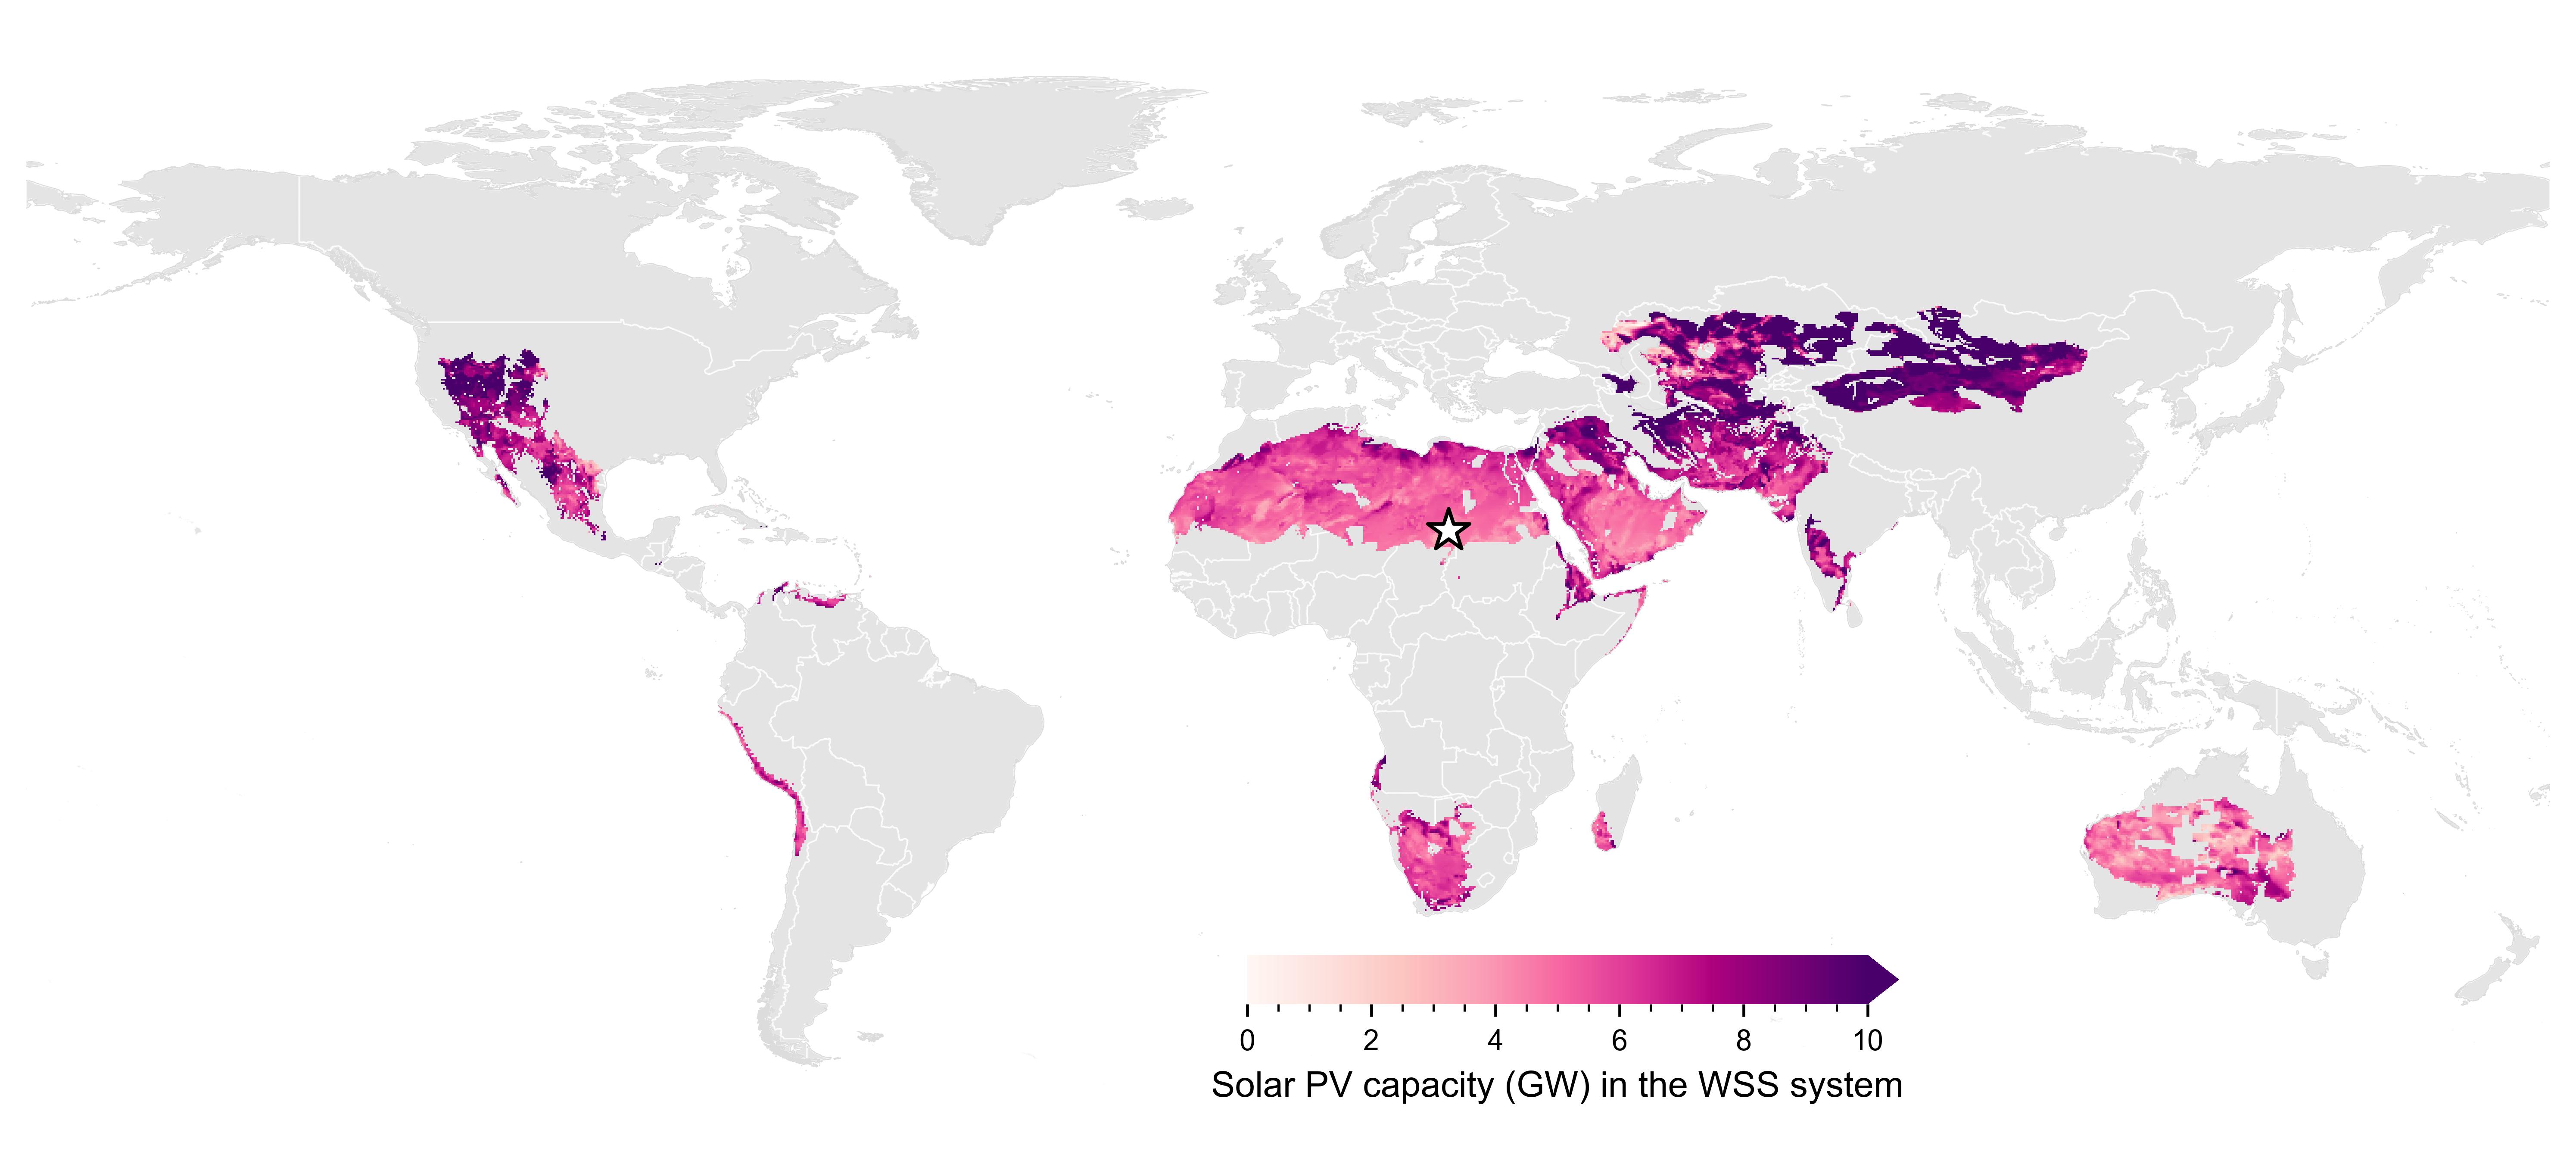

In [9]:

map_vis.set_font()

map_vis.set_bound_color('gainsboro')

fig,ax = map_vis.draw_attr_map(vis_shp=wss_config_gdf.loc[wss_config_gdf['pv_cap']>0],
                                attr_col='pv_cap',
                                cmap='RdPu',
                                out_fig='./data/fig/Vis/wss_pv.png',
                                cbar_label='Generation potential (TWh/yr)',
                                ub=10,
                                with_cbar=False,
                                bound_mode=2,
                                return_fig=True)

ax.scatter([22.75+0.125],[19.75-0.125],
           marker='*',
           s=150,
           facecolor='white',
           edgecolor='black')

ax.set_xlim(-180,180)

map_vis.add_colorbar(fig=fig, 
                     loc=[0.5,0.3,0.2,0.0225],
                     vmax=10,
                     cmap='RdPu',
                     orientation='horizontal',
                     label='Solar PV capacity (GW) in the WSS system')

plt.savefig('./data/fig/Vis/wss_pv.png',bbox_inches='tight')

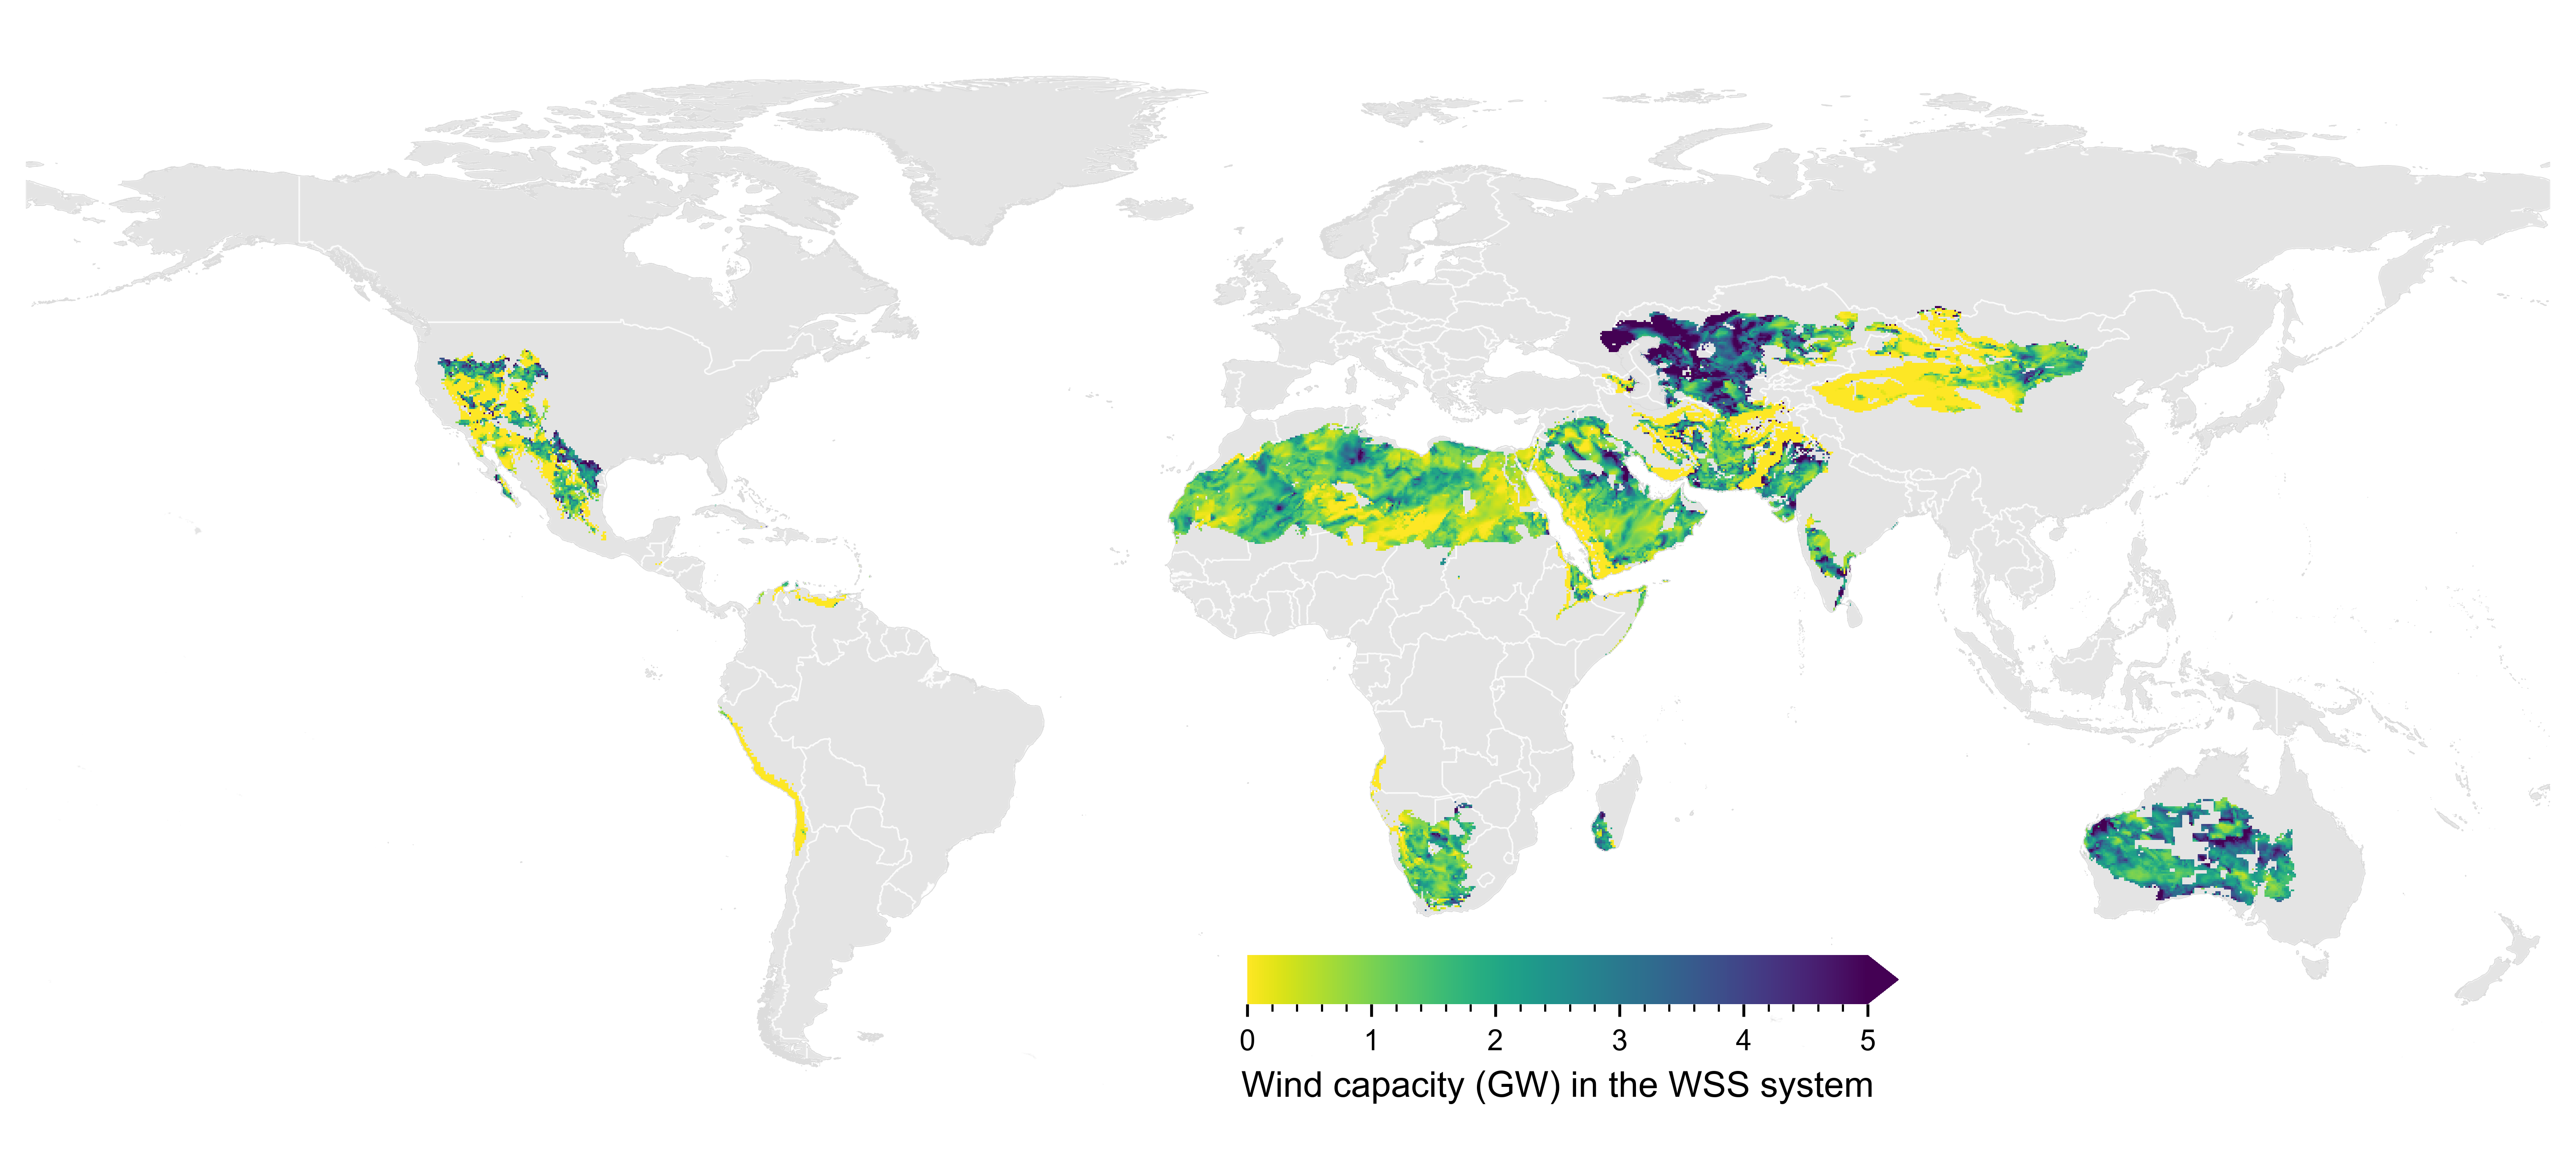

In [10]:

map_vis.set_font()

map_vis.set_bound_color('gainsboro')

fig,ax = map_vis.draw_attr_map(vis_shp=wss_config_gdf.loc[wss_config_gdf['we_cap']>0],
                                attr_col='we_cap',
                                cmap='viridis_r',
                                out_fig='./data/fig/Vis/wss_pv.png',
                                cbar_label='Generation potential (TWh/yr)',
                                ub=5,
                                with_cbar=False,
                                bound_mode=2,
                                return_fig=True)

ax.set_xlim(-180,180)

map_vis.add_colorbar(fig=fig, 
                     loc=[0.5,0.3,0.2,0.0225],
                     vmax=5,
                     cmap='viridis_r',
                     orientation='horizontal',
                     label='Wind capacity (GW) in the WSS system')

plt.savefig('./data/fig/Vis/wss_we.png',bbox_inches='tight')

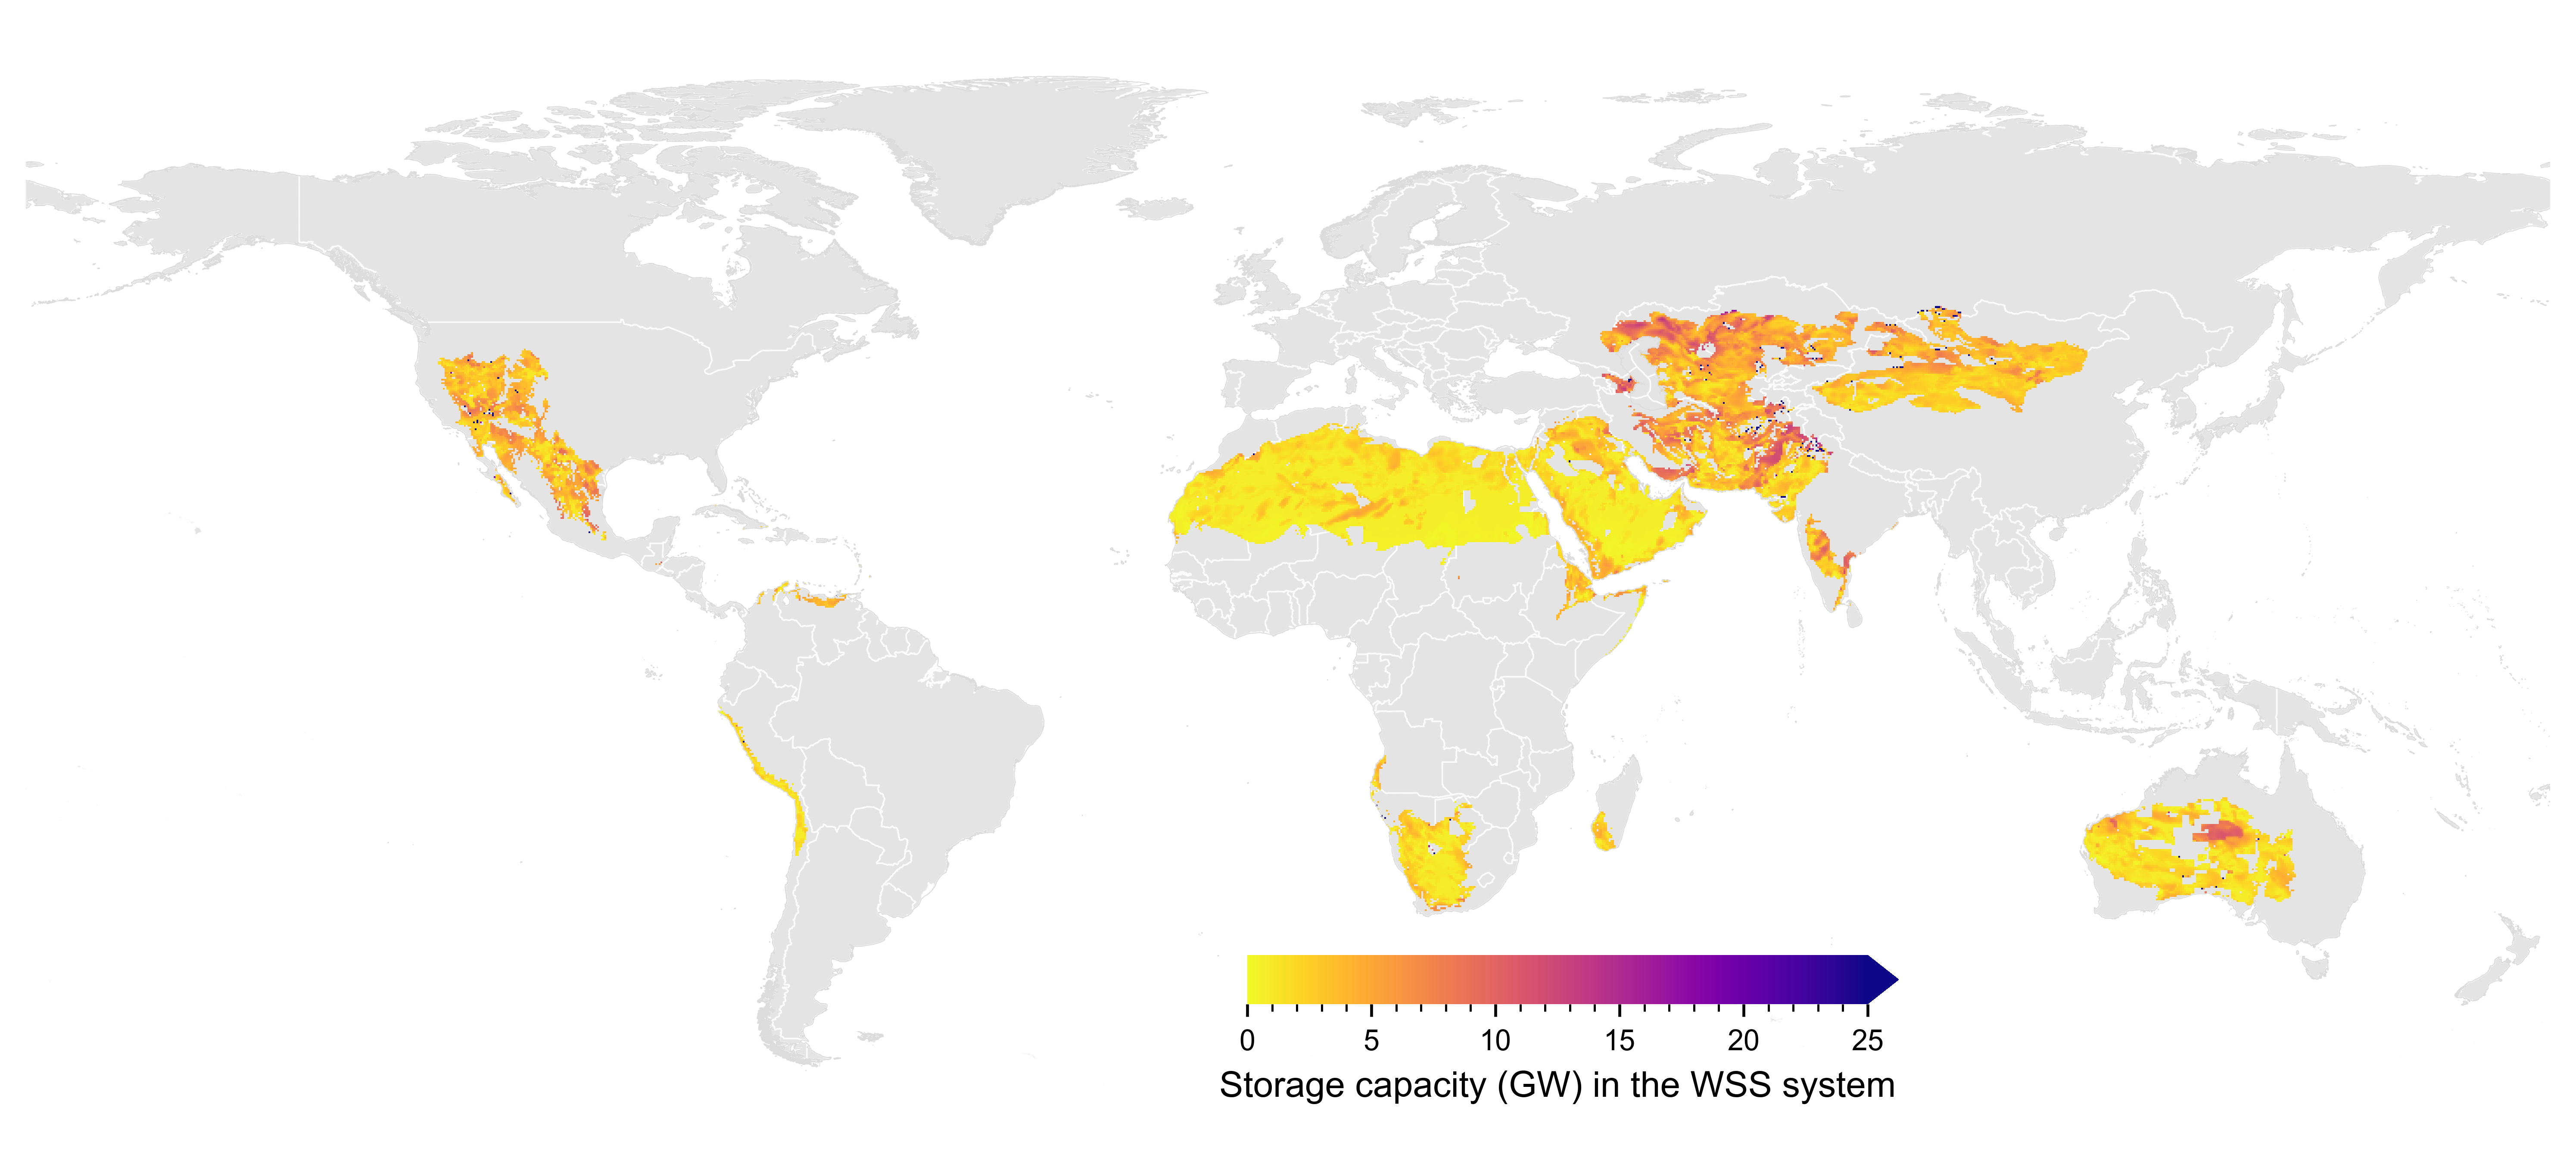

In [11]:

map_vis.set_font()

map_vis.set_bound_color('gainsboro')

fig,ax = map_vis.draw_attr_map(vis_shp=wss_config_gdf.loc[wss_config_gdf['sto_cap']>0],
                                attr_col='sto_cap',
                                cmap='plasma_r',
                                out_fig='./data/fig/Vis/wss_pv.png',
                                cbar_label='Generation potential (TWh/yr)',
                                ub=25,
                                with_cbar=False,
                                bound_mode=2,
                                return_fig=True)

ax.set_xlim(-180,180)

map_vis.add_colorbar(fig=fig, 
                     loc=[0.5,0.3,0.2,0.0225],
                     vmax=25,
                     cmap='plasma_r',
                     orientation='horizontal',
                     label='Storage capacity (GW) in the WSS system')

plt.savefig('./data/fig/Vis/wss_sto.png',bbox_inches='tight')

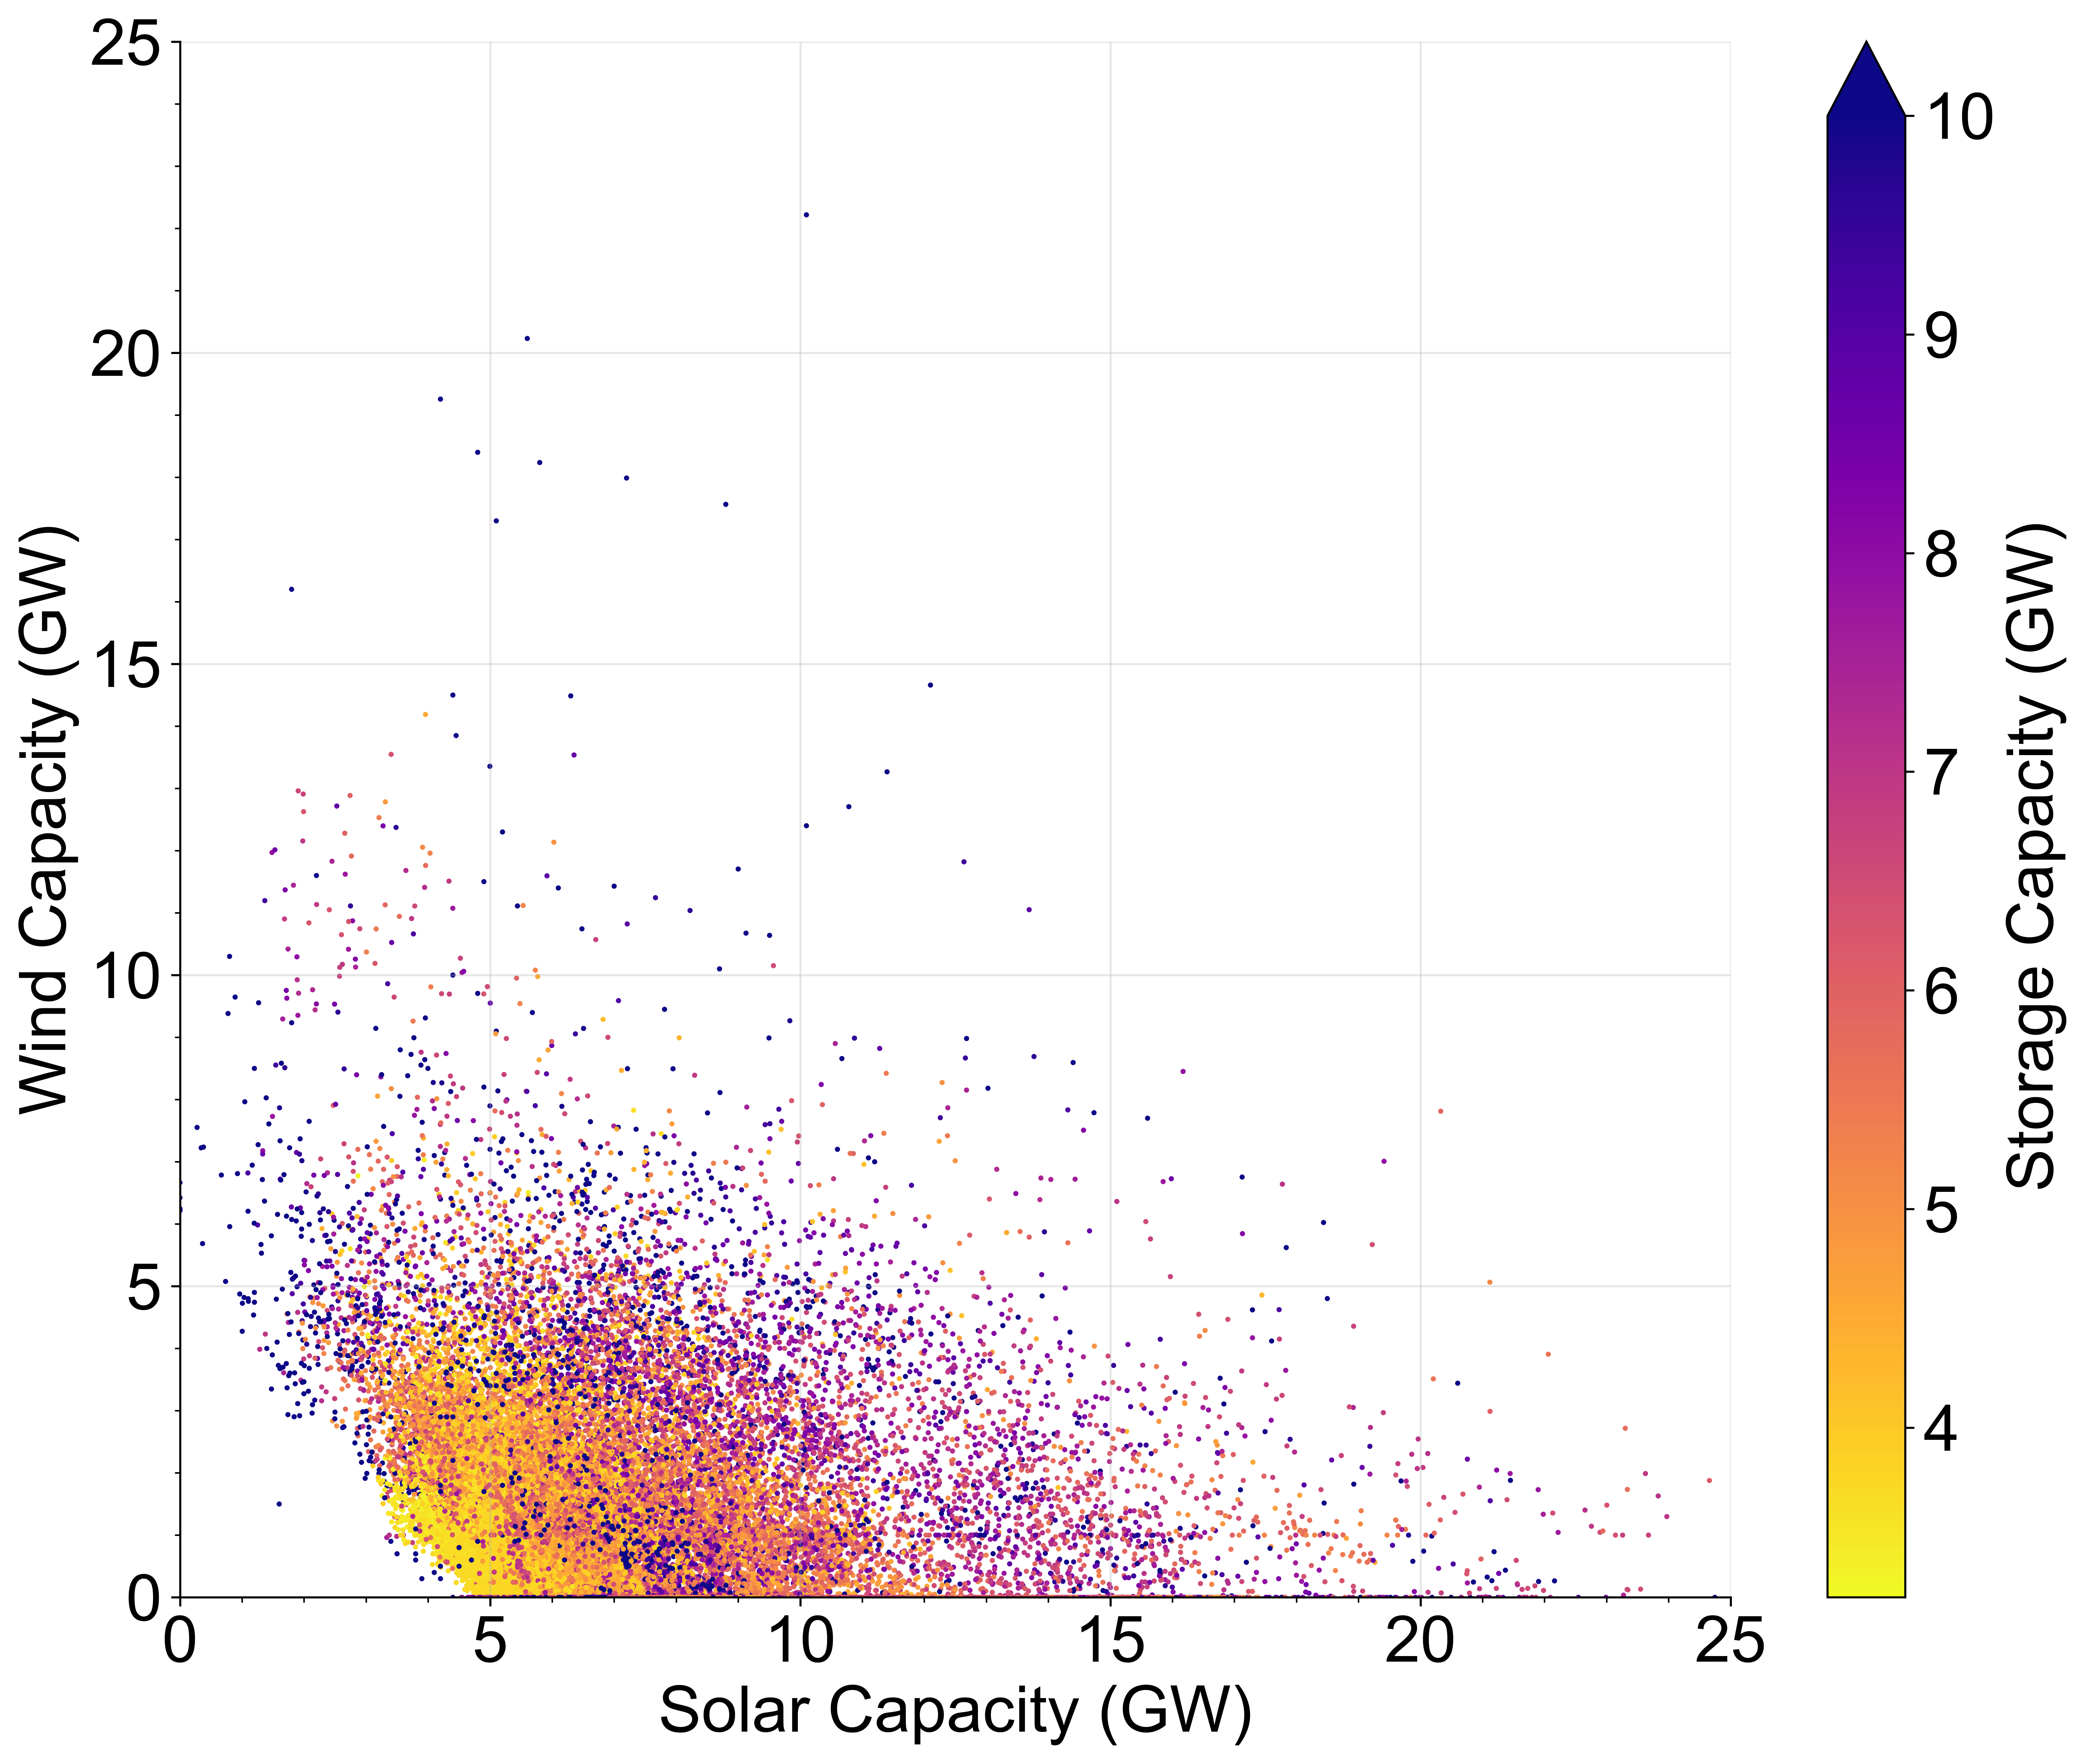

In [12]:
plt.rcParams['font.size'] = 25
plt.rcParams['font.family'] = 'Arial'
x = wss_config_gdf.loc[wss_config_gdf['pv_cap']>0]['pv_cap']
y = wss_config_gdf.loc[wss_config_gdf['pv_cap']>0]['we_cap']
z = wss_config_gdf.loc[wss_config_gdf['pv_cap']>0]['sto_cap']

fig,ax = plt.subplots(figsize=(12, 10),dpi=600)


scatter = plt.scatter(x, y, c=z, cmap='plasma_r', s=1,vmax=10)

# 添加颜色条
plt.colorbar(scatter, label='Storage Capacity (GW)',extend='max')

ax.set_xlim(0,25)
ax.set_ylim(0,25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 设置标签和标题
plt.xlabel('Solar Capacity (GW)')
plt.ylabel('Wind Capacity (GW)')
plt.grid(True, alpha=0.3)

ax.minorticks_on()

plt.tight_layout()

plt.savefig('./data/fig/Vis/wss.png',bbox_inches='tight')
plt.show()